# TCRseq set sequence analysis

Script related to figure 7b-d

### Aim:
- Compare TCR sequences between samples

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Load TCRseq data

In [3]:
!ls "../1.Data/NACT_TCRseq/"

0371A.tsv  1573A.tsv  2585A.tsv  3418A.tsv  4997A.tsv  6902A.tsv  7818B.tsv
0371B.tsv  1573B.tsv  2585B.tsv  3418B.tsv  4997B.tsv  6965A.tsv  7858A.tsv
0481A.tsv  1941A.tsv  2703A.tsv  3582A.tsv  5219A.tsv  6965B.tsv  7858B.tsv
0481B.tsv  1941B.tsv  2703B.tsv  3582B.tsv  5219B.tsv  6986A.tsv  8089A.tsv
0511A.tsv  2050A.tsv  2945A.tsv  3935A.tsv  5244A.tsv  6986B.tsv  8089B.tsv
0511B.tsv  2050B.tsv  2945B.tsv  3935B1.tsv 5244B.tsv  7362A.tsv  8674A.tsv
0564A.tsv  2058A.tsv  3114A.tsv  3935B2.tsv 5441A.tsv  7362B.tsv  8674B.tsv
0564B.tsv  2058B.tsv  3114B.tsv  3935B3.tsv 5441B.tsv  7626A.tsv  9347A.tsv
0762A.tsv  2131M.tsv  3328A.tsv  4160A.tsv  5660A.tsv  7626B.tsv  9347B.tsv
0762B.tsv  2220A.tsv  3328B.tsv  4160B.tsv  5660B.tsv  7678A.tsv  9717A.tsv
0824A.tsv  2220B.tsv  3368A.tsv  4240A.tsv  6229A.tsv  7678B.tsv  9717B.tsv
0824B.tsv  2359B.tsv  3368B.tsv  4240B.tsv  6229B.tsv  7765A.tsv  9883A.tsv
1545A.tsv  2568A.tsv  3397A.tsv  4425A.tsv  6648A.tsv  7765B.tsv  9883B.tsv
1545B.tsv  2

### Exclude samples from analysis (based on adaptive biotech recommendation)

In [6]:
file_keys = home + 'Data/7/Metadata_TCRseq_Greenbaum.Callahan_2.6.17.tsv'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            skiprows=1)

sample_labels.head()

,Subject ID,Sample ID,Progression Free Survival (Days),"PFS Censored Status (0 = PF, 1=Progressed)",Overall Survival (Days),"OS Censored Status (0 = Alive, 1=Dead)",Type of Chemo,Number of Cycles,Platinum Sensitive,Age,C1D1,Date Last F/u,Status,Date of recurrence,Stage,Site Matched,Comments
0,3368,3368A,771,0,1995,0,Carbo/taxol,6,Y,54,09/11/10,26/04/16,AWD,19/12/12,IIIC,Y,NaN
1,3368,3368B,771,0,1995,0,Carbo/taxol,6,Y,55,09/11/10,26/04/16,AWD,19/12/12,IIIC,Y,NaN
2,7362,7362A,351,1,449,1,Carbo/taxol,6,N,76,04/10/10,27/12/11,DOD,20/09/11,IIIC,Y,NaN
3,7362,7362B,351,1,449,1,Carbo/taxol,6,N,77,04/10/10,27/12/11,DOD,20/09/11,IIIC,Y,NaN
4,371,0371A,900,1,1682,0,Carbo/taxol,3,Y,68,01/08/11,09/03/16,AWD,17/01/14,IV,Y,NaN


In [5]:
exc_patients = {'0511', # due low T cell count (clonality unreliable)
                '2050', # due low T cell count (clonality unreliable)
                '2058', # due low nucleated and T cell count (seq unreliable)
                '2359', # due lack of pre-treatment sample
                '2945', # due low nucleated cell count
                '3582', # due low nucleated and T cell count (seq unreliable)
                '4997', # due low nucleated and T cell count (seq unreliable)
                '5219', # due low T cell count (clonality unreliable)
                '5660', # due low nucleated cell count
                '6902', # due low nucleated and T cell count (seq unreliable)
                '7678', # due low nucleated and T cell count (seq unreliable)
                '3935'} # 3 samples

In [6]:
exc_samples = set()
for sample in sample_labels["Sample ID"]:
    
    if sample[:4] in exc_patients:
        
        exc_samples.add(sample)

In [7]:
samples_to_analyse_dict = {}
for s in sample_labels["Sample ID"]:
    
    if s not in exc_samples:        
                       
        samples_to_analyse_dict[s] = pd.read_csv(
            "../1.Data/NACT_TCRseq/"+s+".tsv",
            sep="\t")


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,31,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaco

In [8]:
len(samples_to_analyse_dict)

72

In [9]:
len(samples_to_analyse_dict.keys())/2

36.0

In [10]:
9*4

36

In [11]:
for s in samples_to_analyse_dict:
    
    samples_to_analyse_dict[s] = samples_to_analyse_dict[s].drop(
        
        samples_to_analyse_dict[s][(samples_to_analyse_dict[s]["frame_type"] != "In")].index
    )


## How many different sequences/dna/tcrs do we have?

In [12]:
pre_rearrangement = []
pre_amino_acid = []

post_rearrangement = []
post_amino_acid = []

for s in samples_to_analyse_dict:

    if "A" in s:
    
        dna = list(samples_to_analyse_dict[s]["rearrangement"])
        tcr = list(samples_to_analyse_dict[s]["amino_acid"])
        
        pre_rearrangement += dna
        pre_amino_acid += tcr
        
    elif "B" in s:
        
        dna = list(samples_to_analyse_dict[s]["rearrangement"])
        tcr = list(samples_to_analyse_dict[s]["amino_acid"])
        
        post_rearrangement += dna
        post_amino_acid += tcr

In [13]:
len(pre_rearrangement)

155177

In [14]:
len(pre_amino_acid)

155177

In [15]:
len(post_rearrangement)

154014

In [16]:
len(post_amino_acid)

154014

In [17]:
len(set(pre_rearrangement))

155108

In [18]:
len(set(pre_amino_acid))

150462

In [19]:
len(set(post_rearrangement))

153898

In [20]:
len(set(post_amino_acid))

147815

In [21]:
overall_tcrs = pd.DataFrame({
    "pre": {"seqs":len(pre_rearrangement),
            "dna":len(set(pre_rearrangement)),
            "tcr":len(set(pre_amino_acid))},
    "post": {"seqs":len(pre_rearrangement),
             "dna":len(set(post_rearrangement)),
             "tcr":len(set(post_amino_acid))}
})

overall_tcrs

,pre,post
dna,155108,153898
seqs,155177,155177
tcr,150462,147815


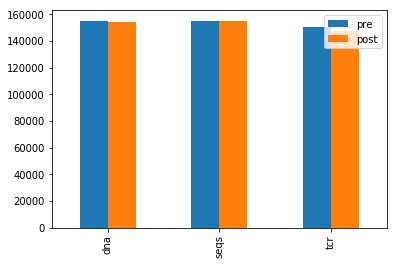

In [22]:
overall_tcrs_plt = overall_tcrs.plot(kind="bar", log=False)

In [23]:
overall_tcrs_plt = overall_tcrs_plt.get_figure()

In [ ]:
overall_tcrs_plt.savefig("../2.Plots/8z_1_number_of_diff_sequences.pdf")

In [24]:
pre_prod_frq = []
post_prod_frq = []

for s in samples_to_analyse_dict:

    if "A" in s:
    
        prod_frq = list(samples_to_analyse_dict[s]["productive_frequency"])
        
        pre_prod_frq += prod_frq
        
    elif "B" in s:
        
        prod_frq = list(samples_to_analyse_dict[s]["productive_frequency"])
        
        post_prod_frq += prod_frq

In [25]:
max(pre_prod_frq)

0.2959783864763532

In [26]:
np.log10(2.7547235474227957e-06)

-5.559921978610032

In [27]:
max(post_prod_frq)

0.18513603185136032

In [28]:
np.log10(max(post_prod_frq))

-0.7325090490410342

In [29]:
prod_frqs = pd.DataFrame({
    "pre": pd.Series(pre_prod_frq),
    "post": pd.Series(post_prod_frq)
})

prod_frqs.tail()

,pre,post
155172,0.035346,NaN
155173,0.005372,NaN
155174,0.006016,NaN
155175,0.011281,NaN
155176,0.012462,NaN


In [30]:
(prod_frqs).max()

pre     0.295978
post    0.185136
dtype: float64

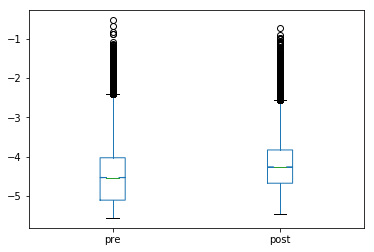

In [31]:
overall_prdfrq_plt = np.log10(prod_frqs).plot(kind="box", notch=True)

In [32]:
overall_prdfrq_plt = overall_prdfrq_plt.get_figure()

In [ ]:
overall_prdfrq_plt.savefig("../2.Plots/8z_2_productive_frequencies_of_sequences.pdf")

In [33]:
scipy.stats.mstats.normaltest(prod_frqs["pre"])


NormaltestResult(statistic=518971.4610212952, pvalue=0.0)

In [34]:
scipy.stats.mannwhitneyu(prod_frqs["pre"],prod_frqs["post"])

MannwhitneyuResult(statistic=9077066983.0, pvalue=0.0)

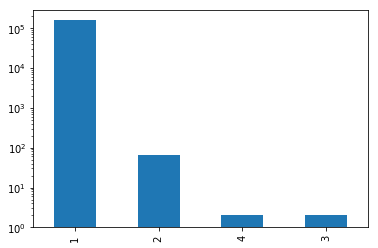

In [35]:
pd.Series(pre_rearrangement).value_counts().value_counts().plot(kind="bar", log=True)

In [36]:
pd.Series(post_rearrangement).value_counts().value_counts()#.plot(kind="bar", log=True)

1    153790
2       100
3         8
dtype: int64

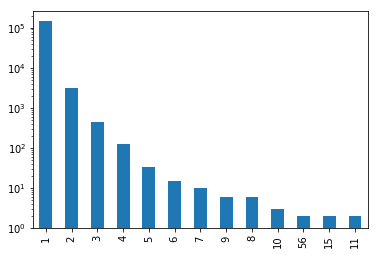

In [37]:
pd.Series(pre_amino_acid).value_counts().value_counts().plot(kind="bar", log=True)

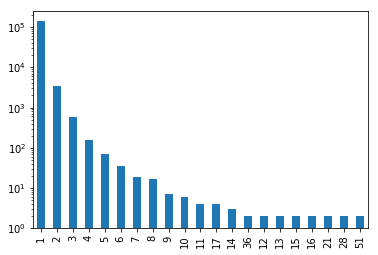

In [38]:
pd.Series(post_amino_acid).value_counts().value_counts().plot(kind="bar", log=True)

In [39]:
pre_rearrangement2 = []
pre_amino_acid2 = []

post_rearrangement2 = []
post_amino_acid2 = []

for s in samples_to_analyse_dict:

    if "A" in s:
    
        dna = list(set(samples_to_analyse_dict[s]["rearrangement"]))
        tcr = list(set(samples_to_analyse_dict[s]["amino_acid"]))
        
        pre_rearrangement2 += dna
        pre_amino_acid2 += tcr
        
    elif "B" in s:
        
        dna = list(set(samples_to_analyse_dict[s]["rearrangement"]))
        tcr = list(set(samples_to_analyse_dict[s]["amino_acid"]))
        
        post_rearrangement2 += dna
        post_amino_acid2 += tcr

In [40]:
len(pre_rearrangement2)

155177

In [41]:
len(post_amino_acid2)

151710

In [42]:
n=0
for lst in post_amino_acid2:
    if "CASSLGPNTEAFF" in lst:
        n+=1
n

9

In [43]:
for s in samples_to_analyse_dict:
    df = samples_to_analyse_dict[s][samples_to_analyse_dict[s]["amino_acid"] == 'CASSLGPNTEAFF']
    
    print(df)

Empty DataFrame
Columns: [rearrangement, amino_acid, frame_type, rearrangement_type, templates, reads, frequency, productive_frequency, cdr3_length, v_family, v_gene, v_allele, d_family, d_gene, d_allele, j_family, j_gene, j_allele, v_deletions, d5_deletions, d3_deletions, j_deletions, n2_insertions, n1_insertions, v_index, n1_index, n2_index, d_index, j_index, v_family_ties, v_gene_ties, v_allele_ties, d_family_ties, d_gene_ties, d_allele_ties, j_family_ties, j_gene_ties, j_allele_ties, sequence_tags, v_shm_count, v_shm_indexes, antibody, bio_identity, v_resolved, d_resolved, j_resolved, sample_name, species, locus, product_subtype, kit_pool, sku, test_name, sample_catalog_tags, sample_rich_tags, sample_rich_tags_json, kit_control, total_templates, productive_templates, outofframe_templates, stop_templates, dj_templates, total_rearrangements, productive_rearrangements, outofframe_rearrangements, stop_rearrangements, dj_rearrangements, total_reads, total_productive_reads, total_outoffr

[0 rows x 94 columns]
                                           rearrangement     amino_acid  \
10713  CCCAACCAGACAGCTCTTTACTTCTGTGCCAGCAGTTTGGGTCCGA...  CASSLGPNTEAFF   
11876  CCCAACCAGACMKCTCTKTACTTCTGTGCCAGCAGTTTAGGACCGA...  CASSLGPNTEAFF   

      frame_type rearrangement_type  templates  reads  frequency  \
10713         In                VDJ          1      9   0.000034   
11876         In                VDJ          1     16   0.000061   

       productive_frequency  cdr3_length    v_family  ...       primer_set  \
10713              0.000042           39     TCRBV24  ...  Human-TCRB-PD2x   
11876              0.000074           39  unresolved  ...  Human-TCRB-PD2x   

       sequence_result_status         release_date          upload_date  \
10713               Published  08/10/2016 11:24:40  07/05/2016 03:54:42   
11876               Published  08/10/2016 11:24:40  07/05/2016 03:54:42   

                                             sample_tags fraction_productive  \
10713 

[1 rows x 94 columns]
Empty DataFrame
Columns: [rearrangement, amino_acid, frame_type, rearrangement_type, templates, reads, frequency, productive_frequency, cdr3_length, v_family, v_gene, v_allele, d_family, d_gene, d_allele, j_family, j_gene, j_allele, v_deletions, d5_deletions, d3_deletions, j_deletions, n2_insertions, n1_insertions, v_index, n1_index, n2_index, d_index, j_index, v_family_ties, v_gene_ties, v_allele_ties, d_family_ties, d_gene_ties, d_allele_ties, j_family_ties, j_gene_ties, j_allele_ties, sequence_tags, v_shm_count, v_shm_indexes, antibody, bio_identity, v_resolved, d_resolved, j_resolved, sample_name, species, locus, product_subtype, kit_pool, sku, test_name, sample_catalog_tags, sample_rich_tags, sample_rich_tags_json, kit_control, total_templates, productive_templates, outofframe_templates, stop_templates, dj_templates, total_rearrangements, productive_rearrangements, outofframe_rearrangements, stop_rearrangements, dj_rearrangements, total_reads, total_productiv

[0 rows x 94 columns]
Empty DataFrame
Columns: [rearrangement, amino_acid, frame_type, rearrangement_type, templates, reads, frequency, productive_frequency, cdr3_length, v_family, v_gene, v_allele, d_family, d_gene, d_allele, j_family, j_gene, j_allele, v_deletions, d5_deletions, d3_deletions, j_deletions, n2_insertions, n1_insertions, v_index, n1_index, n2_index, d_index, j_index, v_family_ties, v_gene_ties, v_allele_ties, d_family_ties, d_gene_ties, d_allele_ties, j_family_ties, j_gene_ties, j_allele_ties, sequence_tags, v_shm_count, v_shm_indexes, antibody, bio_identity, v_resolved, d_resolved, j_resolved, sample_name, species, locus, product_subtype, kit_pool, sku, test_name, sample_catalog_tags, sample_rich_tags, sample_rich_tags_json, kit_control, total_templates, productive_templates, outofframe_templates, stop_templates, dj_templates, total_rearrangements, productive_rearrangements, outofframe_rearrangements, stop_rearrangements, dj_rearrangements, total_reads, total_productiv

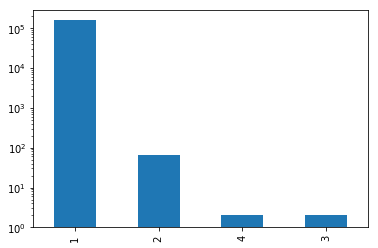

In [44]:
pd.Series(pre_rearrangement2).value_counts().value_counts().plot(kind="bar", log=True)

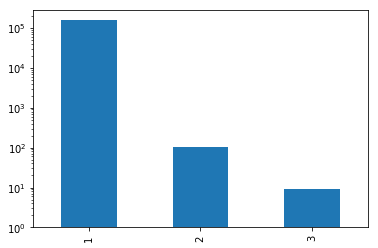

In [45]:
pd.Series(post_rearrangement2).value_counts().value_counts().plot(kind="bar", log=True)

In [46]:
df = pd.DataFrame({
    "pre_amino_acid2": pd.Series(pre_amino_acid2),
    "post_amino_acid2": pd.Series(post_amino_acid2)
})

df.head()

,pre_amino_acid2,post_amino_acid2
0,CASSQGPRTNTEAFF,CASSDSGGTDTQYF
1,CSVRNGAGWREDTQYF,CSAFLAGVGEQYF
2,CASSESGGRTQYF,CASSQTLPGTDTQYF
3,CASSPWTGVKDEQFF,CSAPLGQGVNTEAFF
4,CSASLGPNEQFF,CASSLRDRGYTF


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


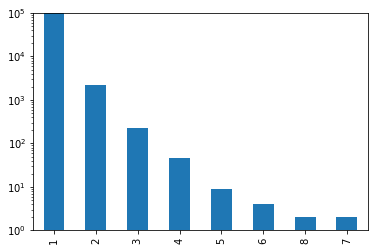

In [47]:
pre_amino_acid2_plt = pd.Series(pre_amino_acid2).value_counts().value_counts().plot(kind="bar",
                                                                                    log=True,
                                                                                    ylim=[0,100000])

In [48]:
pre_amino_acid2_plt = pre_amino_acid2_plt.get_figure()

In [ ]:
pre_amino_acid2_plt.savefig("../2.Plots/8z_1_overlapping_tcrs_across_preNACT_samples.pdf")

In [49]:
pd.Series(post_amino_acid2).value_counts()#.value_counts()

CASSLGPNTEAFF         9
CASSFVSGTDTQYF        7
CASSLAGSTDTQYF        7
CASSAGPYNSPLHF        7
CASSPGQGNTEAFF        7
CASSPTGNTEAFF         7
CASSLAGNTEAFF         7
CSVGTGGTNEKLFF        7
CASSLAGGTDTQYF        6
CASSLGNTEAFF          6
CASSFLAGTDTQYF        6
CASSLGVNTEAFF         6
CASSLAGGGTDTQYF       6
CASSDSSGSTDTQYF       6
CASSPTATNEKLFF        6
CASSLGQGNTEAFF        6
CASSHSYEQYF           6
CASSIRSSYEQYF         5
CASSPSSYEQYF          5
CASSLGGGSYNEQFF       5
CASSLTGNTEAFF         5
CASSPGLNTEAFF         5
CASSPGQGADTQYF        5
CASSPTGGTDTQYF        5
CASSLQGNTEAFF         5
CASSLGMNTEAFF         5
CASSLGQGDQPQHF        5
CASSRQGNYGYTF         5
CASSQGGNQPQHF         5
CASSQGENTEAFF         5
                     ..
CASSQGNPLSVGSYEQYF    1
CAISRRGDGNSPLHF       1
CASSWGQRGVTTDTQYF     1
CASVALAGSSYNEQFF      1
CSAVMGRHSGANVLTF      1
CASSLEGVNTEAFF        1
CASSQDWGAGEQFF        1
CASRQQGSYSNQPQHF      1
CASSLGREGQGTSYGYTF    1
CASSLNLDGDLNQPQHF     1
CASSEQGPFGKLFF  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


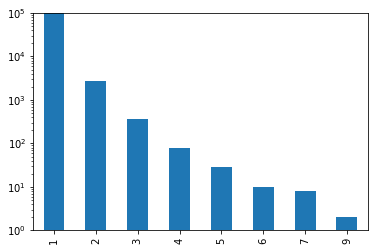

In [50]:
post_amino_acid2_plt = pd.Series(post_amino_acid2).value_counts().value_counts().plot(kind="bar",
                                                                                      log=True,
                                                                                      ylim=[0,100000])

In [51]:
post_amino_acid2_plt = post_amino_acid2_plt.get_figure()

In [ ]:
post_amino_acid2_plt.savefig("../2.Plots/8z_1_overlapping_tcrs_across_postNACT_samples.pdf")

In [52]:
pd.Series(post_amino_acid2).value_counts().value_counts()

1    144605
2      2718
3       370
4        78
5        27
6         9
7         7
9         1
dtype: int64

In [53]:
post_amino_acid2_dict = dict(pd.Series(post_amino_acid2).value_counts().value_counts())

In [54]:
post_amino_acid2_dict[8] = 0 # no sequences were found 8 times

In [55]:
post_amino_acid2_dict

{1: 144605, 2: 2718, 3: 370, 4: 78, 5: 27, 6: 9, 7: 7, 8: 0, 9: 1}

In [56]:
pre_amino_acid2_dict = dict(pd.Series(pre_amino_acid2).value_counts().value_counts())

In [57]:
pre_amino_acid2_dict

{1: 147946, 2: 2237, 3: 221, 4: 45, 5: 8, 6: 3, 7: 1, 8: 1}

In [58]:
pre_amino_acid2_dict[9] = 0

In [59]:
pre_amino_acid2_dict

{1: 147946, 2: 2237, 3: 221, 4: 45, 5: 8, 6: 3, 7: 1, 8: 1, 9: 0}

In [60]:
pre_amino_acid2_dict

{1: 147946, 2: 2237, 3: 221, 4: 45, 5: 8, 6: 3, 7: 1, 8: 1, 9: 0}

In [61]:
f_pre = [pre_amino_acid2_dict[k+1]+1 for k in range(len(pre_amino_acid2_dict))] # to keep order or categores
f_pre 

[147947, 2238, 222, 46, 9, 4, 2, 2, 1]

In [62]:
post_amino_acid2_dict

{1: 144605, 2: 2718, 3: 370, 4: 78, 5: 27, 6: 9, 7: 7, 8: 0, 9: 1}

In [63]:
f_post = [post_amino_acid2_dict[k+1]+1 for k in range(len(post_amino_acid2_dict))] # to keep order or categores
f_post 

[144606, 2719, 371, 79, 28, 10, 8, 1, 2]

In [64]:
scipy.stats.chisquare(f_obs=f_post, f_exp=f_pre)

Power_divergenceResult(statistic=371.11582762180535, pvalue=2.802523771414885e-75)

In [ ]:
# SEPARATE SAMPLES BETWEEN MATCHED UN MATCHED AND COMPARE

In [65]:
sample_labels.head()

,Subject ID,Sample ID,Progression Free Survival (Days),"PFS Censored Status (0 = PF, 1=Progressed)",Overall Survival (Days),"OS Censored Status (0 = Alive, 1=Dead)",Type of Chemo,Number of Cycles,Platinum Sensitive,Age,C1D1,Date Last F/u,Status,Date of recurrence,Stage,Site Matched,Comments
0,3368,3368A,771,0,1995,0,Carbo/taxol,6,Y,54,09/11/10,26/04/16,AWD,19/12/12,IIIC,Y,NaN
1,3368,3368B,771,0,1995,0,Carbo/taxol,6,Y,55,09/11/10,26/04/16,AWD,19/12/12,IIIC,Y,NaN
2,7362,7362A,351,1,449,1,Carbo/taxol,6,N,76,04/10/10,27/12/11,DOD,20/09/11,IIIC,Y,NaN
3,7362,7362B,351,1,449,1,Carbo/taxol,6,N,77,04/10/10,27/12/11,DOD,20/09/11,IIIC,Y,NaN
4,371,0371A,900,1,1682,0,Carbo/taxol,3,Y,68,01/08/11,09/03/16,AWD,17/01/14,IV,Y,NaN


In [66]:
sample_labels.set_index("Sample ID", inplace=True)

In [67]:
sample_labels.loc["0371A", "Site Matched"]

'Y'

In [68]:
pre_rearrangement2_MATCHED = []
pre_amino_acid2_MATCHED = []

post_rearrangement2_MATCHED = []
post_amino_acid2_MATCHED = []

pre_rearrangement2_UNMATCHED = []
pre_amino_acid2_UNMATCHED = []

post_rearrangement2_UNMATCHED = []
post_amino_acid2_UNMATCHED = []

for s in samples_to_analyse_dict:

    dna = list(set(samples_to_analyse_dict[s]["rearrangement"]))
    tcr = list(set(samples_to_analyse_dict[s]["amino_acid"]))
    
    if "A" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            pre_rearrangement2_MATCHED += dna
            pre_amino_acid2_MATCHED += tcr
            
        else:
            
            pre_rearrangement2_UNMATCHED += dna
            pre_amino_acid2_UNMATCHED += tcr
        
    elif "B" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            post_rearrangement2_MATCHED += dna
            post_amino_acid2_MATCHED += tcr
            
        else:
            
            post_rearrangement2_UNMATCHED += dna
            post_amino_acid2_UNMATCHED += tcr


In [69]:
len(set(pre_rearrangement2_MATCHED) | set(post_rearrangement2_MATCHED)) # union

137653

In [70]:
len(set(pre_rearrangement2_MATCHED) & set(post_rearrangement2_MATCHED)) # intersection

7005

In [71]:
len(set(pre_rearrangement2_UNMATCHED) | set(post_rearrangement2_UNMATCHED)) # union

161032

In [72]:
len(set(pre_rearrangement2_UNMATCHED) & set(post_rearrangement2_UNMATCHED)) # intersection

3397

Rearrengements
          MATCHED  UNMATCHED
UNION     137653    161032
INTER     7005      3397

In [73]:
scipy.stats.fisher_exact([[137653, 161032] , [7005, 3397]])

(0.41453471025518523, 0.0)

In [74]:
len(set(pre_amino_acid2_MATCHED) | set(post_amino_acid2_MATCHED)) # union

129881

In [75]:
len(set(pre_amino_acid2_MATCHED) & set(post_amino_acid2_MATCHED)) # intersection

11032

In [76]:
len(set(pre_amino_acid2_UNMATCHED) | set(post_amino_acid2_UNMATCHED)) # union

153886

In [77]:
len(set(pre_amino_acid2_UNMATCHED) & set(post_amino_acid2_UNMATCHED)) # intersection

6524

Amino acid
          MATCHED  UNMATCHED
UNION     129881    153886
INTER     11032      6524

In [78]:
scipy.stats.fisher_exact([[129881, 153886] , [11032, 6524]])

(0.4991214242516264, 0.0)

In [79]:
scipy.stats.chi2_contingency([[129881, 153886] , [11032, 6524]])

(1934.1050155533221, 0.0, 1, array([[132702.97743949, 151064.02256051],
        [  8210.02256051,   9345.97743949]]))

In [80]:
import sys

In [81]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [82]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


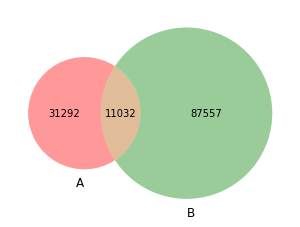

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

venn2([set(pre_amino_acid2_MATCHED), set(post_amino_acid2_MATCHED)])

plt.show()


In [84]:
fig.savefig("../2.Plots/8z_3_Matched_SampleWise_Venn.pdf")

In [85]:
(31292+11031)/(87557+11032)

0.42928724299871185

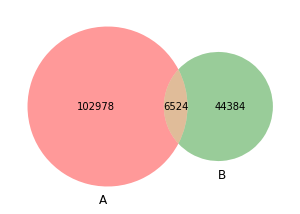

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

venn2([set(pre_amino_acid2_UNMATCHED), set(post_amino_acid2_UNMATCHED)])
plt.show()

In [ ]:
fig.savefig("../2.Plots/8z_3_Unmatched_SampleWise_Venn.pdf")

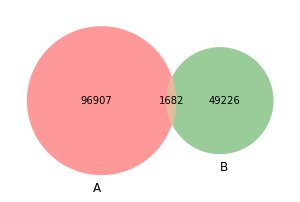

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

venn2([set(post_amino_acid2_MATCHED), set(post_amino_acid2_UNMATCHED)])
plt.show()

In [ ]:
fig.savefig("../2.Plots/8z_3_PostMatchedUnmatched_SampleWise_Venn.pdf")

In [ ]:
# Check shared and not-shared TCRs per patient

In [88]:
pre_rearrangement3_MATCHED = dict()
pre_amino_acid3_MATCHED = dict()

post_rearrangement3_MATCHED = dict()
post_amino_acid3_MATCHED = dict()

pre_rearrangement3_UNMATCHED = dict()
pre_amino_acid3_UNMATCHED = dict()

post_rearrangement3_UNMATCHED = dict()
post_amino_acid3_UNMATCHED = dict()

for s in samples_to_analyse_dict:

    dna = list(set(samples_to_analyse_dict[s]["rearrangement"]))
    tcr = list(set(samples_to_analyse_dict[s]["amino_acid"]))
    
    if "A" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            pre_rearrangement3_MATCHED[s[:4]] = dna
            pre_amino_acid3_MATCHED[s[:4]] = tcr
            
        else:
            
            pre_rearrangement3_UNMATCHED[s[:4]] = dna
            pre_amino_acid3_UNMATCHED[s[:4]] = tcr
        
    elif "B" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            post_rearrangement3_MATCHED[s[:4]] = dna
            post_amino_acid3_MATCHED[s[:4]] = tcr
            
        else:
            
            post_rearrangement3_UNMATCHED[s[:4]] = dna
            post_amino_acid3_UNMATCHED[s[:4]] = tcr

In [89]:
pre_rearrangement3_MATCHED.keys()

dict_keys(['3368', '7362', '0371', '9717', '8674', '4240', '0564', '3114', '2585', '7765', '6965', '2703', '9347', '0762', '0824', '7626'])

In [90]:
matched_shared_rearrangement = []
matched_different_pre_rearrangement = []
matched_different_post_rearrangement = []

unmatched_shared_rearrangement = []
unmatched_different_pre_rearrangement = []
unmatched_different_post_rearrangement = []

matched_shared_aminoacid = []
matched_different_pre_aminoacid = []
matched_different_post_aminoacid = []

unmatched_shared_aminoacid = []
unmatched_different_pre_aminoacid = []
unmatched_different_post_aminoacid = []

samples = set()

for s in sample_labels["Subject ID"]:
    
    s = str(s)
    
    if len(s) < 4:
        s = "0"+s
    
    if s not in samples:
        
        samples.add(s)
    
        if s in pre_rearrangement3_MATCHED:

            #print('hu')

            shared_dna = len(set(pre_rearrangement3_MATCHED[s]) & set(post_rearrangement3_MATCHED[s]))
            pre_dna    = len(set(pre_rearrangement3_MATCHED[s]) - set(post_rearrangement3_MATCHED[s]))
            post_dna   = len(set(post_rearrangement3_MATCHED[s]) - set(pre_rearrangement3_MATCHED[s]))

            matched_shared_rearrangement.append(shared_dna)
            matched_different_pre_rearrangement.append(pre_dna)
            matched_different_post_rearrangement.append(post_dna)

            shared_tcr = len(set(pre_amino_acid3_MATCHED[s]) & set(post_amino_acid3_MATCHED[s]))
            pre_tcr    = len(set(pre_amino_acid3_MATCHED[s]) - set(post_amino_acid3_MATCHED[s]))
            post_tcr   = len(set(post_amino_acid3_MATCHED[s]) - set(pre_amino_acid3_MATCHED[s]))

            matched_shared_aminoacid.append(shared_tcr)
            matched_different_pre_aminoacid.append(pre_tcr)
            matched_different_post_aminoacid.append(post_tcr)

        elif s in pre_rearrangement3_UNMATCHED:

            shared_dna = len(set(pre_rearrangement3_UNMATCHED[s]) & set(post_rearrangement3_UNMATCHED[s]))
            pre_dna    = len(set(pre_rearrangement3_UNMATCHED[s]) - set(post_rearrangement3_UNMATCHED[s]))
            post_dna   = len(set(post_rearrangement3_UNMATCHED[s]) - set(pre_rearrangement3_UNMATCHED[s]))

            unmatched_shared_rearrangement.append(shared_dna)
            unmatched_different_pre_rearrangement.append(pre_dna)
            unmatched_different_post_rearrangement.append(post_dna)

            shared_tcr = len(set(pre_amino_acid3_UNMATCHED[s]) & set(post_amino_acid3_UNMATCHED[s]))
            pre_tcr    = len(set(pre_amino_acid3_UNMATCHED[s]) - set(post_amino_acid3_UNMATCHED[s]))
            post_tcr   = len(set(post_amino_acid3_UNMATCHED[s]) - set(pre_amino_acid3_UNMATCHED[s]))

            unmatched_shared_aminoacid.append(shared_tcr)
            unmatched_different_pre_aminoacid.append(pre_tcr)
            unmatched_different_post_aminoacid.append(post_tcr)
        

In [91]:
dna_seq = pd.DataFrame({
    "matched_shared": pd.Series(matched_shared_rearrangement),
    "matched_pre": pd.Series(matched_different_pre_rearrangement),
    "matched_post": pd.Series(matched_different_post_rearrangement),
    "unmatched_shared": pd.Series(unmatched_shared_rearrangement),
    "unmatched_pre": pd.Series(unmatched_different_pre_rearrangement),
    "unmatched_post": pd.Series(unmatched_different_post_rearrangement),
})

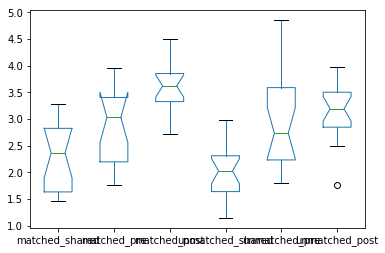

In [92]:
np.log10(dna_seq).plot(kind="box", notch=True)

In [93]:
tcr_seq = pd.DataFrame({
    "matched_shared": pd.Series(matched_shared_aminoacid),
    "matched_pre": pd.Series(matched_different_pre_aminoacid),
    "matched_post": pd.Series(matched_different_post_aminoacid),
    "unmatched_shared": pd.Series(unmatched_shared_aminoacid),
    "unmatched_pre": pd.Series(unmatched_different_pre_aminoacid),
    "unmatched_post": pd.Series(unmatched_different_post_aminoacid),
})

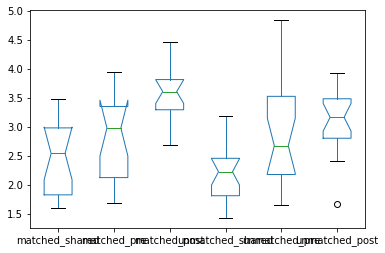

In [94]:
tcr_seq_plt = np.log10(tcr_seq).plot(kind="box", notch=True)

In [95]:
tcr_seq.head()

,matched_shared,matched_pre,matched_post,unmatched_shared,unmatched_pre,unmatched_post
0,40.0,79.0,4791.0,67,217,632
1,264.0,143.0,7121.0,282,483,2148
2,1572.0,4990.0,6698.0,33,3167,47
3,136.0,247.0,1734.0,312,726,2995
4,467.0,913.0,1620.0,39,164,708


In [96]:
values = []
labels = []
for c in tcr_seq:
    
    values += list(tcr_seq[c].dropna())
    
    for i in range(len(tcr_seq[c].dropna())):
        labels.append(c)

In [97]:
len(values) == len(labels)

True

In [98]:
tcr_seq_sns = pd.DataFrame({
    "tcr_label": pd.Series(labels),
    "tcr_value": pd.Series(np.log10(values))
})

tcr_seq_sns.head()

,tcr_label,tcr_value
0,matched_shared,1.602060
1,matched_shared,2.421604
2,matched_shared,3.196453
3,matched_shared,2.133539
4,matched_shared,2.669317


In [99]:
tcr_seq

,matched_shared,matched_pre,matched_post,unmatched_shared,unmatched_pre,unmatched_post
0,40.0,79.0,4791.0,67,217,632
1,264.0,143.0,7121.0,282,483,2148
2,1572.0,4990.0,6698.0,33,3167,47
3,136.0,247.0,1734.0,312,726,2995
4,467.0,913.0,1620.0,39,164,708
5,91.0,1014.0,495.0,1576,3100,8570
6,973.0,8852.0,2083.0,61,46,6566
7,40.0,135.0,819.0,91,48,6176
8,40.0,49.0,3492.0,492,7003,3717
9,913.0,1419.0,6564.0,182,391,1220


In [100]:
tcr_seq_sns["tcr_label"].value_counts()

unmatched_shared    20
unmatched_post      20
unmatched_pre       20
matched_post        16
matched_pre         16
matched_shared      16
Name: tcr_label, dtype: int64

In [101]:
flierprops = dict(markersize=5,
                  linestyle="-", marker="o")

(0, 6)

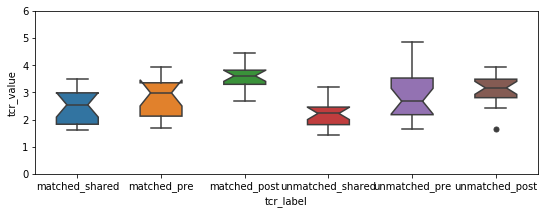

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(9,3)

"""sns.violinplot(x="tcr_label",
               y="tcr_value",
               data=tcr_seq_sns,
               inner=None,
               split=False,
               scale="count",
               zorder=0,
               width=0.7,
               alpha=0.3)"""

sns.boxplot(x="tcr_label",
            y="tcr_value",
            data=tcr_seq_sns,
            notch=True,
            width=0.5,
            zorder=1,
            flierprops=flierprops)

plt.ylim([0,6])

In [ ]:
fig.savefig("../2.Plots/8z_2_overlapping_tcrs_pre_postNACT.pdf")

In [103]:
scipy.stats.friedmanchisquare(
    tcr_seq["matched_shared"].dropna(),
    tcr_seq["matched_pre"].dropna(),
    tcr_seq["matched_post"].dropna()
)

FriedmanchisquareResult(statistic=26.375, pvalue=1.873878895066732e-06)

In [104]:
import scipy as sp
import scipy.stats as st
import itertools as it

In [105]:
def friedman_test(*args):
    """
        Performs a Friedman ranking test.
        Tests the hypothesis that in a set of k dependent samples groups (where k >= 2) at least two of the groups represent populations with different median values.
        
        Parameters
        ----------
        sample1, sample2, ... : array_like
            The sample measurements for each group.
            
        Returns
        -------
        F-value : float
            The computed F-value of the test.
        p-value : float
            The associated p-value from the F-distribution.
        rankings : array_like
            The ranking for each group.
        pivots : array_like
            The pivotal quantities for each group.
            
        References
        ----------
        M. Friedman, The use of ranks to avoid the assumption of normality implicit in the analysis of variance, Journal of the American Statistical Association 32 (1937) 674–701.
        D.J. Sheskin, Handbook of parametric and nonparametric statistical procedures. crc Press, 2003, Test 25: The Friedman Two-Way Analysis of Variance by Ranks
    """
    k = len(args)
    if k < 2: raise ValueError('Less than 2 levels')
    n = len(args[0])
    if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

    rankings = []
    for i in range(n):
        row = [col[i] for col in args]
        row_sort = sorted(row)
        rankings.append([row_sort.index(v) + 1 + (row_sort.count(v)-1)/2. for v in row])

    rankings_avg = [sp.mean([case[j] for case in rankings]) for j in range(k)]
    rankings_cmp = [r/sp.sqrt(k*(k+1)/(6.*n)) for r in rankings_avg]

    chi2 = ((12*n)/float((k*(k+1))))*((sp.sum(r**2 for r in rankings_avg))-((k*(k+1)**2)/float(4)))
    iman_davenport = ((n-1)*chi2)/float((n*(k-1)-chi2))

    p_value = 1 - st.f.cdf(iman_davenport, k-1, (k-1)*(n-1))

    return iman_davenport, p_value, rankings_avg, rankings_cmp

In [106]:
iman_davenport, p_value, rankings_avg, rankings_cmp = friedman_test(
    tcr_seq["unmatched_shared"].dropna(),
    tcr_seq["unmatched_pre"].dropna(),
    tcr_seq["unmatched_post"].dropna()
)

p_value

3.9122324269058595e-08

In [107]:
def nemenyi_multitest(ranks):
    """
        Performs a Nemenyi post-hoc test using the pivot quantities obtained by a ranking test.
        Tests the hypothesis that the ranking of each pair of groups are different.
        
        Parameters
        ----------
        pivots : dictionary_like
            A dictionary with format 'groupname':'pivotal quantity' 
            
        Returns
        ----------
        Comparions : array-like
            Strings identifier of each comparison with format 'group_i vs group_j'
        Z-values : array-like
            The computed Z-value statistic for each comparison.
        p-values : array-like
            The associated p-value from the Z-distribution wich depends on the index of the comparison
        Adjusted p-values : array-like
            The associated adjusted p-values wich can be compared with a significance level
            
        References
        ----------
        Bonferroni-Dunn: O.J. Dunn, Multiple comparisons among means, Journal of the American Statistical Association 56 (1961) 52–64.
    """
    k = len(ranks)
    values = list(ranks.values())
    keys = list(ranks.keys())
    versus = list(it.combinations(range(k), 2))

    comparisons = [keys[vs[0]] + " vs " + keys[vs[1]] for vs in versus]
    z_values = [abs(values[vs[0]] - values[vs[1]]) for vs in versus]
    p_values = [2*(1-st.norm.cdf(abs(z))) for z in z_values]
    # Sort values by p_value so that p_0 < p_1
    p_values, z_values, comparisons = map(list, zip(*sorted(zip(p_values, z_values, comparisons), key=lambda t: t[0])))
    m = int(k*(k-1)/2.)
    adj_p_values = [min(m*p_value,1) for p_value in p_values]
    
    return comparisons, z_values, p_values, adj_p_values

In [108]:
comp_dict = {
    "shared":rankings_cmp[0],
    "pre":rankings_cmp[1],
    "post":rankings_cmp[2]
}

In [109]:
nemenyi_multitest(comp_dict)

(['shared vs post', 'shared vs pre', 'pre vs post'],
 [4.743416490252569, 3.320391543176799, 1.4230249470757697],
 [2.10143595591461e-06, 0.000898912788114048, 0.1547289234853788],
 [6.30430786774383e-06, 0.002696738364342144, 0.46418677045613643])

In [110]:
rankings_avg

[1.15, 2.2, 2.65]

In [111]:
stac.nonparametric_tests.nemenyi_multitest()

NameError: name 'stac' is not defined

In [ ]:
samples_to_analyse_dict["3368A"].head()

In [ ]:
# Check freq of each TCR and divide into shared, pre, post | matched, unmatched

In [ ]:
pre_rearrangement3_MATCHED = dict()
pre_amino_acid3_MATCHED = dict()
pre_prodfrq3_MATCHED = dict()

post_rearrangement3_MATCHED = dict()
post_amino_acid3_MATCHED = dict()
post_prodfrq3_MATCHED = dict()

pre_rearrangement3_UNMATCHED = dict()
pre_amino_acid3_UNMATCHED = dict()
pre_prodfrq3_UNMATCHED = dict()

post_rearrangement3_UNMATCHED = dict()
post_amino_acid3_UNMATCHED = dict()
post_prodfrq3_UNMATCHED = dict()

for s in samples_to_analyse_dict:

    dna = list(samples_to_analyse_dict[s]["rearrangement"])
    tcr = list(samples_to_analyse_dict[s]["amino_acid"])
    frq = list(samples_to_analyse_dict[s]["productive_frequency"])
    
    if "A" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            pre_rearrangement3_MATCHED[s[:4]] = dna
            pre_amino_acid3_MATCHED[s[:4]] = tcr
            pre_prodfrq3_MATCHED[s[:4]] = frq

            
        else:
            
            pre_rearrangement3_UNMATCHED[s[:4]] = dna
            pre_amino_acid3_UNMATCHED[s[:4]] = tcr
            pre_prodfrq3_UNMATCHED[s[:4]] = frq

        
    elif "B" in s:
        
        if sample_labels.loc[s, "Site Matched"] == "Y":
        
            post_rearrangement3_MATCHED[s[:4]] = dna
            post_amino_acid3_MATCHED[s[:4]] = tcr
            post_prodfrq3_MATCHED[s[:4]] = frq
            
        else:
            
            post_rearrangement3_UNMATCHED[s[:4]] = dna
            post_amino_acid3_UNMATCHED[s[:4]] = tcr
            post_prodfrq3_UNMATCHED[s[:4]] = frq


In [ ]:
s[:4]

In [ ]:
post_prodfrq3_UNMATCHED['8089'][:7]

In [ ]:
matched_shared_rearrangement4 = []
matched_different_pre_rearrangement4 = []
matched_different_post_rearrangement4 = []

unmatched_shared_rearrangement4 = []
unmatched_different_pre_rearrangement4 = []
unmatched_different_post_rearrangement4 = []

matched_shared_aminoacid4 = []
matched_different_pre_aminoacid4 = []
matched_different_post_aminoacid4 = []

unmatched_shared_aminoacid4 = []
unmatched_different_pre_aminoacid4 = []
unmatched_different_post_aminoacid4 = []

samples = set()

for sub in sample_labels["Subject ID"]:
    
    sub = str(sub)
    
    if len(sub) < 4:
        sub = "0"+sub
    
    if sub not in samples:
        
        samples.add(sub)
    
        if sub in pre_rearrangement3_MATCHED:

            #print('hu')

            shared_dna = set(pre_rearrangement3_MATCHED[sub]) & set(post_rearrangement3_MATCHED[sub])
            pre_dna    = set(pre_rearrangement3_MATCHED[sub]) - set(post_rearrangement3_MATCHED[sub])
            post_dna   = set(post_rearrangement3_MATCHED[sub]) - set(pre_rearrangement3_MATCHED[sub])
            
            matched_shared_rearrangement4 += list(shared_dna)
            matched_different_pre_rearrangement4 += list(pre_dna)
            matched_different_post_rearrangement4 += list(post_dna)

            shared_tcr = set(pre_amino_acid3_MATCHED[sub]) & set(post_amino_acid3_MATCHED[sub])
            pre_tcr    = set(pre_amino_acid3_MATCHED[sub]) - set(post_amino_acid3_MATCHED[sub])
            post_tcr   = set(post_amino_acid3_MATCHED[sub]) - set(pre_amino_acid3_MATCHED[sub])

            matched_shared_aminoacid4 += list(shared_tcr)
            matched_different_pre_aminoacid4 += list(pre_tcr)
            matched_different_post_aminoacid4 += list(post_tcr)

        elif sub in pre_rearrangement3_UNMATCHED:

            shared_dna = set(pre_rearrangement3_UNMATCHED[sub]) & set(post_rearrangement3_UNMATCHED[sub])
            pre_dna    = set(pre_rearrangement3_UNMATCHED[sub]) - set(post_rearrangement3_UNMATCHED[sub])
            post_dna   = set(post_rearrangement3_UNMATCHED[sub]) - set(pre_rearrangement3_UNMATCHED[sub])

            unmatched_shared_rearrangement4 += list(shared_dna)
            unmatched_different_pre_rearrangement4 += list(pre_dna)
            unmatched_different_post_rearrangement4 += list(post_dna)

            shared_tcr = set(pre_amino_acid3_UNMATCHED[sub]) & set(post_amino_acid3_UNMATCHED[sub])
            pre_tcr    = set(pre_amino_acid3_UNMATCHED[sub]) - set(post_amino_acid3_UNMATCHED[sub])
            post_tcr   = set(post_amino_acid3_UNMATCHED[sub]) - set(pre_amino_acid3_UNMATCHED[sub])

            unmatched_shared_aminoacid4 += list(shared_tcr)
            unmatched_different_pre_aminoacid4 += list(pre_tcr)
            unmatched_different_post_aminoacid4 += list(post_tcr)
            

In [ ]:
matched_shared_pre_rearrangement4_frq = []       # 1
matched_different_pre_rearrangement4_frq = []    # 2

matched_shared_post_rearrangement4_frq = []      # 3
matched_different_post_rearrangement4_frq = []   # 4

unmatched_shared_pre_rearrangement4_frq = []     # 5
unmatched_different_pre_rearrangement4_frq = []  # 6

unmatched_shared_post_rearrangement4_frq = []    # 7
unmatched_different_post_rearrangement4_frq = [] # 8

matched_shared_pre_aminoacid4_frq = []           # 9
matched_different_pre_aminoacid4_frq = []        # 10

matched_shared_post_aminoacid4_frq = []          # 11 
matched_different_post_aminoacid4_frq = []       # 12 

unmatched_shared_pre_aminoacid4_frq = []         # 13
unmatched_different_pre_aminoacid4_frq = []      # 14

unmatched_shared_post_aminoacid4_frq = []        # 15
unmatched_different_post_aminoacid4_frq = []     # 16

for subject in pre_rearrangement3_MATCHED:
    for i, d in enumerate(pre_rearrangement3_MATCHED[subject]):     
        if d in matched_shared_rearrangement4: # 1
            matched_shared_pre_rearrangement4_frq.append(pre_prodfrq3_MATCHED[subject][i])
        elif d in matched_different_pre_rearrangement4: # 2
            matched_different_pre_rearrangement4_frq.append(pre_prodfrq3_MATCHED[subject][i])       
        else:
            raise ValueError(1)
        
for subject in post_rearrangement3_MATCHED: 
    for i, d in enumerate(post_rearrangement3_MATCHED[subject]):        
        if d in matched_shared_rearrangement4: # 3
            matched_shared_post_rearrangement4_frq.append(post_prodfrq3_MATCHED[subject][i])
        elif d in matched_different_post_rearrangement4: # 4
            matched_different_post_rearrangement4_frq.append(post_prodfrq3_MATCHED[subject][i])
        else:
            raise ValueError()
            
for subject in pre_rearrangement3_UNMATCHED:    
    for i, d in enumerate(pre_rearrangement3_UNMATCHED[subject]):        
        if d in unmatched_shared_rearrangement4: # 5
            unmatched_shared_pre_rearrangement4_frq.append(pre_prodfrq3_UNMATCHED[subject][i])
        elif d in unmatched_different_pre_rearrangement4: # 6
            unmatched_different_pre_rearrangement4_frq.append(pre_prodfrq3_UNMATCHED[subject][i])
        else:
            raise ValueError()
        
for subject in post_rearrangement3_UNMATCHED:    
    for i, d in enumerate(post_rearrangement3_UNMATCHED[subject]):        
        if d in unmatched_shared_rearrangement4: # 7
            unmatched_shared_post_rearrangement4_frq.append(post_prodfrq3_UNMATCHED[subject][i])
        elif d in unmatched_different_post_rearrangement4: # 8
            unmatched_different_post_rearrangement4_frq.append(post_prodfrq3_UNMATCHED[subject][i])
        else:
            raise ValueError()
            
for subject in pre_amino_acid3_MATCHED:    
    for i, d in enumerate(pre_amino_acid3_MATCHED[subject]):        
        if d in matched_shared_aminoacid4: # 9
            matched_shared_pre_aminoacid4_frq.append(pre_prodfrq3_MATCHED[subject][i])
        elif d in matched_different_pre_aminoacid4: # 10
            matched_different_pre_aminoacid4_frq.append(pre_prodfrq3_MATCHED[subject][i])
        else:
            raise ValueError()    
            
for subject in post_amino_acid3_MATCHED:    
    for i, d in enumerate(post_amino_acid3_MATCHED[subject]):        
        if d in matched_shared_aminoacid4: # 11
            matched_shared_post_aminoacid4_frq.append(post_prodfrq3_MATCHED[subject][i])
        elif d in matched_different_post_aminoacid4: # 12
            matched_different_post_aminoacid4_frq.append(post_prodfrq3_MATCHED[subject][i])
        else:
            raise ValueError()
            
for subject in pre_amino_acid3_UNMATCHED:    
    for i, d in enumerate(pre_amino_acid3_UNMATCHED[subject]):        
        if d in unmatched_shared_aminoacid4: # 13
            unmatched_shared_pre_aminoacid4_frq.append(pre_prodfrq3_UNMATCHED[subject][i])
        elif d in unmatched_different_pre_aminoacid4: # 14
            unmatched_different_pre_aminoacid4_frq.append(pre_prodfrq3_UNMATCHED[subject][i])
        else:
            raise ValueError()
            
for subject in post_amino_acid3_UNMATCHED:    
    for i, d in enumerate(post_amino_acid3_UNMATCHED[subject]):        
        if d in unmatched_shared_aminoacid4: # 15
            unmatched_shared_post_aminoacid4_frq.append(post_prodfrq3_UNMATCHED[subject][i])
        elif d in unmatched_different_post_aminoacid4: # 16
            unmatched_different_post_aminoacid4_frq.append(post_prodfrq3_UNMATCHED[subject][i])
        else:
            raise ValueError()

In [ ]:
dna_frq = pd.DataFrame({
    "matched_shared_pre": pd.Series(matched_shared_pre_rearrangement4_frq),
    "matched_shared_post": pd.Series(matched_shared_post_rearrangement4_frq),
    "matched_pre": pd.Series(matched_different_pre_rearrangement4_frq),
    "matched_post": pd.Series(matched_different_post_rearrangement4_frq),
    "unmatched_shared_pre": pd.Series(unmatched_shared_pre_rearrangement4_frq),
    "unmatched_shared_post": pd.Series(unmatched_shared_post_rearrangement4_frq),
    "unmatched_pre": pd.Series(unmatched_different_pre_rearrangement4_frq),
    "unmatched_post": pd.Series(unmatched_different_post_rearrangement4_frq),
})

In [ ]:
np.log10(dna_frq).plot(kind="box", notch=True)

In [ ]:
(dna_frq).plot(kind="box", notch=True)

In [ ]:
tcr_frq = pd.DataFrame({
    "matched_shared_pre": pd.Series(matched_shared_pre_aminoacid4_frq),
    "matched_shared_post": pd.Series(matched_shared_post_aminoacid4_frq),
    "matched_pre": pd.Series(matched_different_pre_aminoacid4_frq),
    "matched_post": pd.Series(matched_different_post_aminoacid4_frq),
    "unmatched_shared_pre": pd.Series(unmatched_shared_pre_aminoacid4_frq),
    "unmatched_shared_post": pd.Series(unmatched_shared_post_aminoacid4_frq),
    "unmatched_pre": pd.Series(unmatched_different_pre_aminoacid4_frq),
    "unmatched_post": pd.Series(unmatched_different_post_aminoacid4_frq),
})

In [ ]:
np.log10(tcr_frq).plot(kind="box", notch=True)

In [ ]:
len(dna_frq["matched_shared_pre"].dropna())

In [ ]:
len(dna_frq["matched_shared_post"].dropna())

In [ ]:
tcr_frq.head()

In [ ]:
values = []
labels = []
for c in tcr_frq:
    
    values += list(tcr_frq[c].dropna())
    
    for i in range(len(tcr_frq[c].dropna())):
        labels.append(c)

In [ ]:
len(values) == len(labels)

In [ ]:
tcr_frq_sns = pd.DataFrame({
    "tcr_label": pd.Series(labels),
    "tcr_value": pd.Series(np.log10(values))
})

tcr_frq_sns.head()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(21,3)

sns.violinplot(x="tcr_label",
               y="tcr_value",
               data=tcr_frq_sns,
               inner="quartile",
               split=False,
               scale="count",
               zorder=0,
               width=0.7,
               alpha=0.3)

sns.boxplot(x="tcr_label",
            y="tcr_value",
            data=tcr_frq_sns,
            notch=True,
            width=0.5,
            zorder=1,
            flierprops=flierprops)

plt.ylim([-6,0])

In [ ]:
fig.savefig("../2.Plots/8z_3_overlapping_tcrs_freqs_pre_postNACT2.pdf")

In [ ]:
(tcr_frq_sns["tcr_label"].value_counts())

In [ ]:
np.log10(0.01)

In [ ]:
# dwnsample to the grp with less no of tcrs

In [ ]:
list(tcr_frq["matched_shared_post"].dropna().sample(n=10775).head())

In [ ]:
iman_davenport, p_value, rankings_avg, rankings_cmp = friedman_test(
    list(tcr_frq["matched_shared_pre"].dropna().sample(n=5716)),
    list(tcr_frq["matched_shared_post"].dropna().sample(n=5716)),
    list(tcr_frq["matched_pre"].dropna().sample(n=5716)),
    list(tcr_frq["matched_post"].dropna().sample(n=5716))
)

p_value

In [ ]:
comp_tcr_frq_dict = {
    "shared_pre":rankings_cmp[0],
    "shared_post":rankings_cmp[1],
    "pre":rankings_cmp[2],
    "post":rankings_cmp[3]
}

In [ ]:
nemenyi_multitest(comp_tcr_frq_dict)

In [ ]:
iman_davenport, p_value, rankings_avg, rankings_cmp = friedman_test(
    list(tcr_frq["unmatched_shared_pre"].dropna().sample(n=5716)),
    list(tcr_frq["unmatched_shared_post"].dropna()),
    list(tcr_frq["unmatched_pre"].dropna().sample(n=5716)),
    list(tcr_frq["unmatched_post"].dropna().sample(n=5716))
)

p_value

In [ ]:
comp_tcr_frq_dict = {
    "shared_pre":rankings_cmp[0],
    "shared_post":rankings_cmp[1],
    "pre":rankings_cmp[2],
    "post":rankings_cmp[3]
}

In [ ]:
nemenyi_multitest(comp_tcr_frq_dict)

# End script